# Import libraries

In [11]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pickle
from tensorflow.keras.models import load_model
from keras.preprocessing import image  # Import the image module


# Testing Inference

In [12]:
# Load Models
model_ann = load_model('model_InceptionV3.h5')

**Insight:** Load model model inception V3

In [13]:
# Mendefinsiikan resize ukuran gambar
img_size = 224

Saving Ipsala.jpg to Ipsala (3).jpg


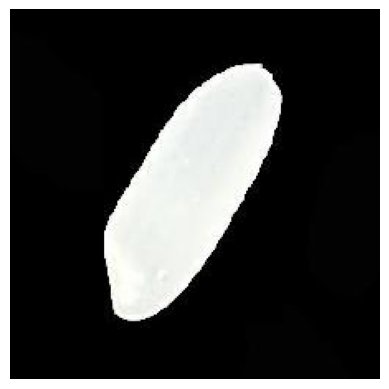

1/1 [==============================] - 1s 1s/step
Prediction: Ipsala with confidence 0.9999935626983643


In [14]:
# Upload file
uploaded = files.upload()

for fn in uploaded.keys():
    # Load gambar
    path = fn
    img = image.load_img(path, target_size=(img_size, img_size))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Convert gambar ke numpy array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Normalisasi gambar
    x /= 255.0

    # prediksi probabilities kelas
    classes = model_ann.predict(x)

    # Map predicted probabilities ke kelas yang ada
    predicted_class = np.argmax(classes)
    threshold = 0.5  # mendefinisikan treshold

    if classes[0, predicted_class] < threshold:
        print('Prediction: Unknown')
    else:
        class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
        predicted_class_name = class_names[predicted_class]
        print(f'Prediction: {predicted_class_name} with confidence {classes[0, predicted_class]}')


**Insight:** Hasil dari klasifikasi menggunakan model inceptionV3 telah berhasil memprediksi kelas varietas ipsala yang memprediksi secara benar, yaitu kelas ipsala dengan confidence sebesar 0.99.